# Sección 6: Teorema del Sandwich (Teorema de Compresión)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, symbols, limit, Abs

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Teorema del Sandwich (Teorema de Compresión)

**Definición Formal**:  
Si tenemos tres funciones tales que:
$ f(x) \leq h(x) \leq g(x) $
para todo $x$ en un intervalo alrededor de $c$ (excepto posiblemente en $c$ mismo), y:
$ \lim_{x \to c} f(x) = \lim_{x \to c} g(x) = L $
entonces:
$ \lim_{x \to c} h(x) = L $


### Ejemplo Clásico: Función Oscilante


Límite función inferior: 0
Límite función superior: 0
Límite función original (por Sandwich): 0


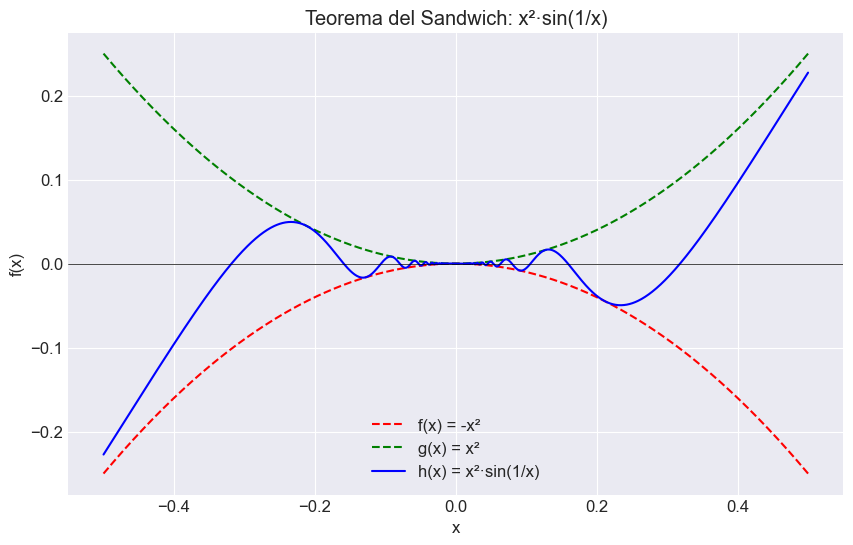

In [3]:
x = symbols('x')
h = x**2 * sin(1/x)  # Función problema
f = -x**2            # Función inferior
g = x**2             # Función superior

# Calcular límites
limite_inf = limit(f, x, 0)
limite_sup = limit(g, x, 0)
limite_h = limit(h, x, 0)

print(f"Límite función inferior: {limite_inf}")
print(f"Límite función superior: {limite_sup}")
print(f"Límite función original (por Sandwich): {limite_h}")

# Gráfico de las funciones cerca de x=0
x_vals = np.linspace(-0.5, 0.5, 1000)
x_vals = x_vals[x_vals != 0]  # Excluir x=0

plt.plot(x_vals, [f.subs(x, val) for val in x_vals], 'r--', label='f(x) = -x²')
plt.plot(x_vals, [g.subs(x, val) for val in x_vals], 'g--', label='g(x) = x²')
plt.plot(x_vals, [h.subs(x, val) for val in x_vals], 'b-', label='h(x) = x²·sin(1/x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Teorema del Sandwich: x²·sin(1/x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## 2. Aplicación con Desigualdad Dada

**Ejemplo del PDF**:

Límite inferior en x=-1: -1
Límite superior en x=-1: -1


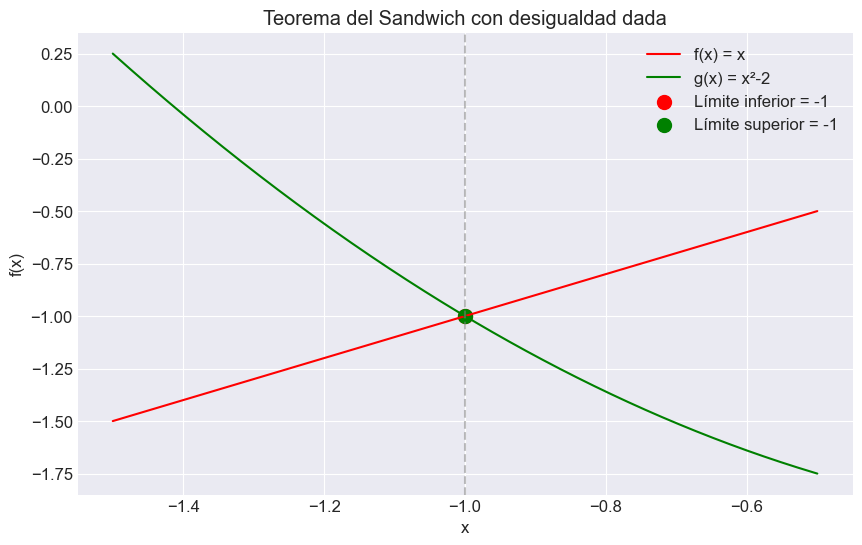

In [4]:
# Definir las funciones
f_func = x
h_func = symbols('f(x)')  # Función desconocida
g_func = x**2 - 2

# Evaluar en x → -1
lim_f = limit(f_func, x, -1)
lim_g = limit(g_func, x, -1)

print(f"Límite inferior en x=-1: {lim_f}")
print(f"Límite superior en x=-1: {lim_g}")

# Gráfico alrededor de x=-1
x_vals = np.linspace(-1.5, -0.5, 500)

plt.plot(x_vals, [f_func.subs(x, val) for val in x_vals], 'r-', label='f(x) = x')
plt.plot(x_vals, [g_func.subs(x, val) for val in x_vals], 'g-', label='g(x) = x²-2')
plt.axvline(-1, color='gray', linestyle='--', alpha=0.5)
plt.scatter(-1, lim_f, color='red', s=100, label=f'Límite inferior = {lim_f}')
plt.scatter(-1, lim_g, color='green', s=100, label=f'Límite superior = {lim_g}')
plt.title('Teorema del Sandwich con desigualdad dada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## 3. Caso General con Funciones Personalizadas

**Implementación interactiva**:

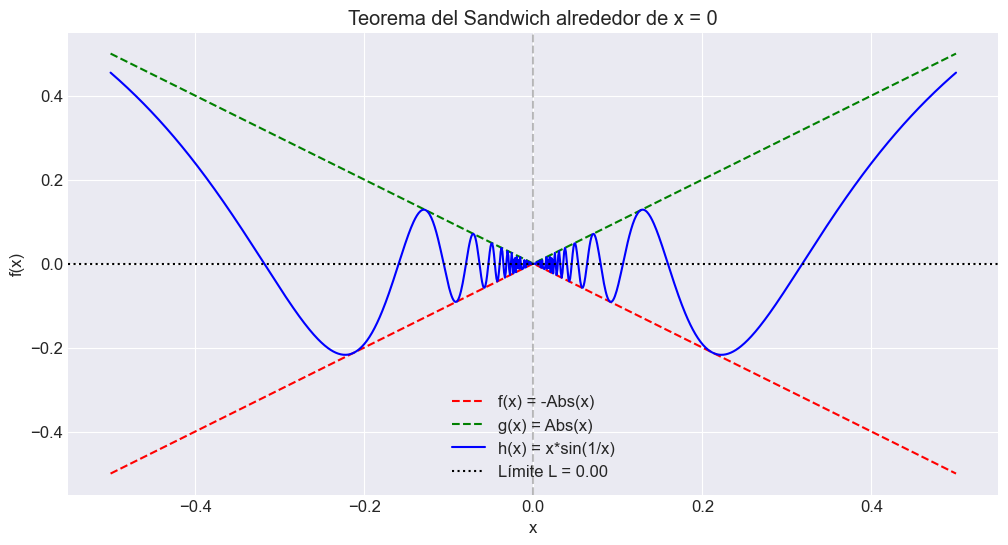

Límite calculado para h(x) cuando x→0: 0


In [11]:
def plot_squeeze(h_expr, f_expr, g_expr, c, interval=1.0):
    """
    Visualiza el Teorema del Sandwich para funciones dadas
    """
    # Calcular límites
    L1 = limit(f_expr, x, c)
    L2 = limit(g_expr, x, c)
    
    if L1 != L2:
        print("¡Advertencia! Los límites no coinciden, no se puede aplicar el teorema")
        return
    
    # Crear datos para el gráfico
    x_vals = np.linspace(c-interval, c+interval, 1000)
    x_vals = x_vals[x_vals != c]  # Excluir el punto c si es necesario
    
    # Evaluar funciones
    y_f = [f_expr.subs(x, val) for val in x_vals]
    y_g = [g_expr.subs(x, val) for val in x_vals]
    y_h = [h_expr.subs(x, val) for val in x_vals]
    
    # Gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(x_vals, y_f, 'r--', label=f'f(x) = {str(f_expr)}')
    plt.plot(x_vals, y_g, 'g--', label=f'g(x) = {str(g_expr)}')
    plt.plot(x_vals, y_h, 'b-', label=f'h(x) = {str(h_expr)}')
    plt.axhline(L1, color='black', linestyle=':', label=f'Límite L = {float(L1):.2f}')
    plt.axvline(c, color='gray', linestyle='--', alpha=0.5)
    plt.title(f'Teorema del Sandwich alrededor de x = {c}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Límite calculado para h(x) cuando x→{c}: {L1}")

# Ejemplo de uso
x = symbols('x')
h_expr = x * sin(1/x)
f_expr = -Abs(x) # type: ignore
g_expr = Abs(x)
plot_squeeze(h_expr, f_expr, g_expr, 0, 0.5)


## Resumen Teórico

| **Concepto**               | **Descripción**                                                                 | **Condiciones Clave**                              |
|----------------------------|---------------------------------------------------------------------------------|----------------------------------------------------|
| Funciones envolventes      | $f(x) ≤ h(x) ≤ g(x)$ para $x$ cerca de $c$                                            | Desigualdad debe cumplirse en un entorno de $c$      |
| Límites iguales            | $\lim f(x) = \lim g(x) = L$ cuando $x→c$                                              | Ambos límites deben existir y ser iguales          |
| Conclusión                 | $\lim h(x) = L$ cuando $x→c$                                                         | $h(x)$ queda "comprimida" entre $f(x)$ y $g(x)$          |
| Aplicaciones típicas       | Funciones oscilantes ($sin$, $cos$), funciones con comportamiento complejo en puntos | Cuando otros métodos (sustitución, factorización) fallan |
